# IPSL_10_years_trend_example with xarray and ProPlot

In [74]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
from cartopy.util import add_cyclic_point
import proplot as plot

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 58 GB / percent used: 53.3 %


### Get the IPSL data (all members) from 2005 to 2014 for NH

In [6]:
def get_data():
    n_realization = 31 # 31
    list_da = []
    
    for i in range(1,n_realization+1):
        
        path = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r'+str(i)+'i1p1f1/LImon/snc/gr/latest/'\
               'snc_LImon_IPSL-CM6A-LR_historical_r'+str(i)+'i1p1f1_gr_185001-201412.nc'
        
        list_da.append(xr.open_dataset(path).snc.sel(time=slice('2005','2014'), lat=slice(20, 90)))

    snc = xr.concat(
        list_da, 
        pd.Index(['r'+str(i)+'i1p1f1' for i in range(1,n_realization+1)], name='realization')
    )
    
    return snc

In [10]:
snc = get_data()
u.check_virtual_memory()
snc

Virtual memory usage - total: 126 GB / available: 60 GB / percent used: 52.3 %


<xarray.DataArray 'snc' (realization: 31, time: 120, lat: 56, lon: 144)>
array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[ 0.,  0.,  0., ...,  0.,  0

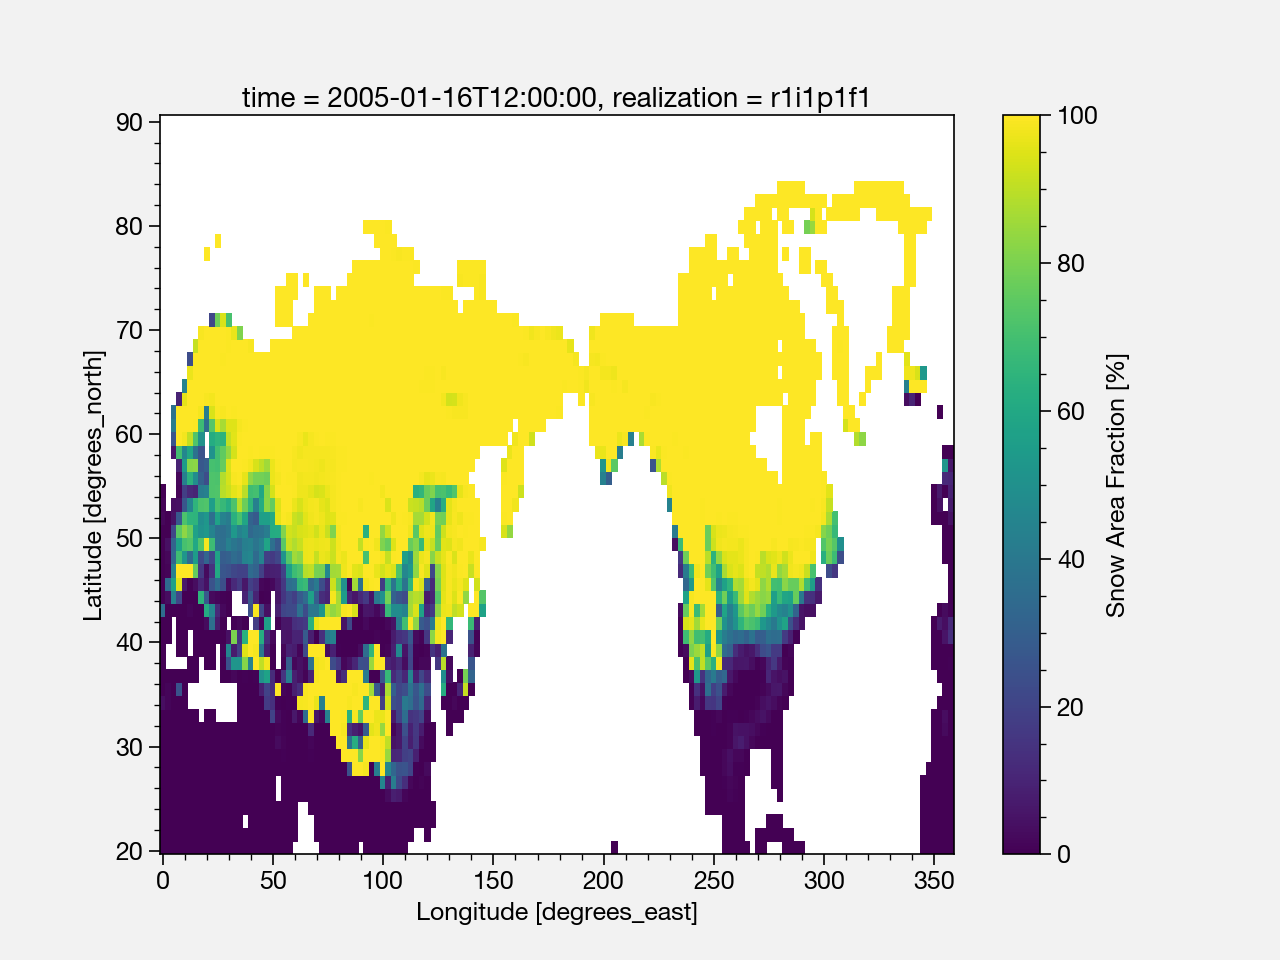

In [14]:
snc[0,0].plot()

### Compute the MAM climatology

In [49]:
MAM_ens_cmip6 = u.custom_season_clim(snc, calendar=snc.time.encoding['calendar'], season='MAM')
MAM_ens_cmip6

<xarray.DataArray (realization: 31, lat: 56, lon: 144)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0

### Compute the ensemble mean

In [50]:
ens_avg_snow = MAM_ens_cmip6.mean('realization', skipna=False, keep_attrs=True)
ens_avg_snow

<xarray.DataArray (lat: 56, lon: 144)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 20.28169 21.549295 22.816902 ... 88.73239 90.0
    season   <U3 'MAM'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

## Plot

In [59]:
ens_avg_snow.season.values

array('MAM', dtype='<U3')

In [65]:
ens_avg_snow

<xarray.DataArray (lat: 56, lon: 144)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 20.28169 21.549295 22.816902 ... 88.73239 90.0
    season   <U3 'MAM'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [80]:
def cyclic_dataarray(da, coord='lon'):
    """ Add a cyclic coordinate point to a DataArray along a specified
    named coordinate dimension.
    >>> from xray import DataArray
    >>> data = DataArray([[1, 2, 3], [4, 5, 6]],
    ...                      coords={'x': [1, 2], 'y': range(3)},
    ...                      dims=['x', 'y'])
    >>> cd = cyclic_dataarray(data, 'y')
    >>> print cd.data
    array([[1, 2, 3, 1],
           [4, 5, 6, 4]])
    """
    assert isinstance(da, xr.DataArray)

    lon_idx = da.dims.index(coord)
    cyclic_data, cyclic_coord = add_cyclic_point(da.values,
                                                 coord=da.coords[coord],
                                                 axis=lon_idx)

    # Copy and add the cyclic coordinate and data
    new_coords = dict(da.coords)
    new_coords[coord] = cyclic_coord
    new_values = cyclic_data

    new_da = xr.DataArray(new_values, dims=da.dims, coords=new_coords)

    # Copy the attributes for the re-constructed data and coords
    for att, val in da.attrs.items():
        new_da.attrs[att] = val
    for c in da.coords:
        for att in da.coords[c].attrs:
            new_da.coords[c].attrs[att] = da.coords[c].attrs[att]

    return new_da


In [82]:
ens_avg_snow

<xarray.DataArray (lat: 56, lon: 144)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 20.28169 21.549295 22.816902 ... 88.73239 90.0
    season   <U3 'MAM'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [81]:
ens_avg_snow_cyclic = cyclic_dataarray(ens_avg_snow)
ens_avg_snow_cyclic

<xarray.DataArray (lat: 56, lon: 145)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 352.5 355.0 357.5 360.0
  * lat      (lat) float32 20.28169 21.549295 22.816902 ... 88.73239 90.0
    season   <U3 'MAM'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [ ]:
cyclic_data, cyclic_lons = add_cyclic_point(ens_avg_snow_MAM.values, coord=ens_avg_snow_MAM.lon)

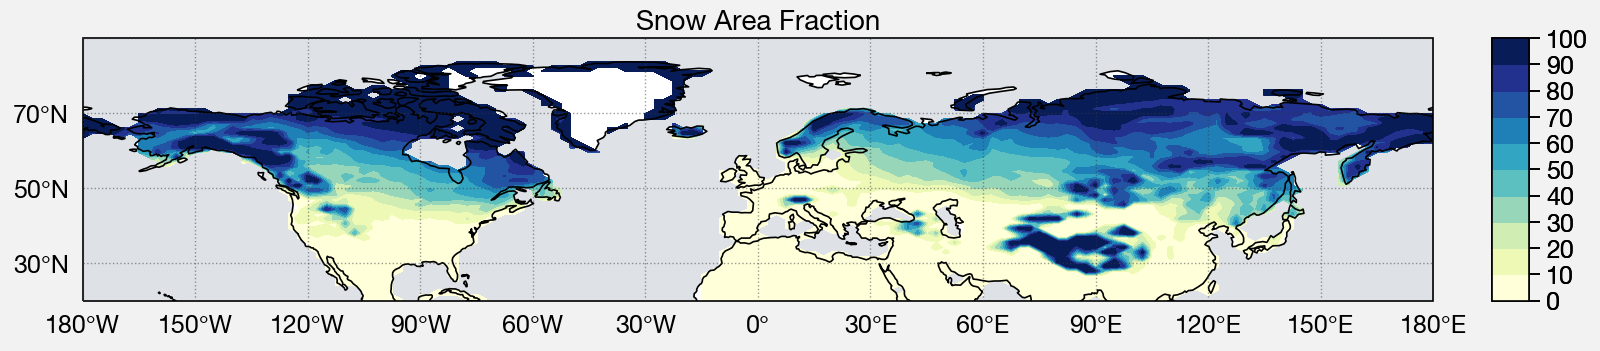

In [83]:
f, axs = plot.subplots(proj='cyl', width=8)

m = axs[0].contourf(ens_avg_snow_cyclic, cmap='YlGnBu')

f.colorbar(m)

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', latlim=(20,90)
#     suptitle=ens_avg_snow.season.values
)

In [ ]:
snc

In [11]:
snc_mean_seasons = snc.groupby('time.season').mean('time', skipna=False)
snc_mean_seasons

<xarray.DataArray 'snc' (realization: 31, season: 4, lat: 56, lon: 144)>
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00,

In [13]:
ens_avg_snow_MAM = snc_mean_seasons.sel(season='MAM').mean('realization')

# Make cyclic data function